![QuantConnect Logo](https://cdn.quantconnect.com/web/i/icon.png)
<hr>

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import quantconnect as qc

In [3]:
from strategies import LegMeta, StrategyBase, measure_period_profit
import plots

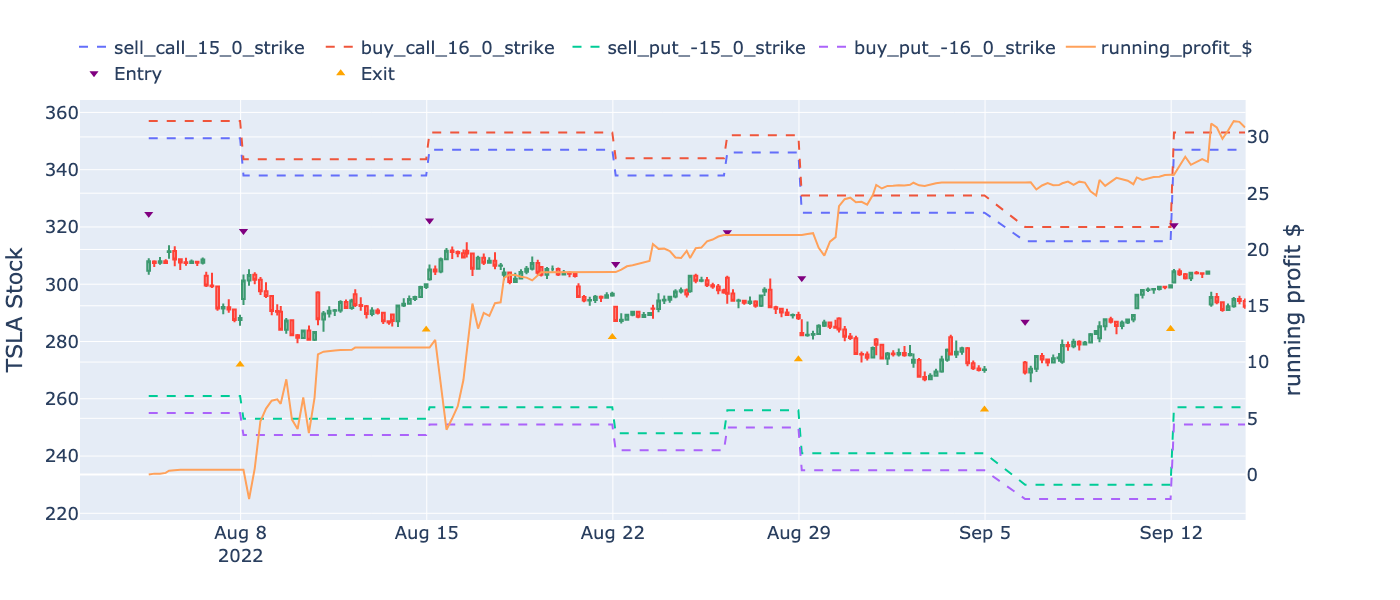

In [4]:
# Instantiate the QuantBookWrapper class, which will call QuantConnect API (or
# the QuantConnect simulator when offline)
qbw = qc.QuantBookWrapper(locals(), ticker='tsla')

# Retrieve the last 200 bars of the underlying's history
stock = qbw.get_stock_history(nbars=200)

# Define the legs of the strategy (Iron Condor shown here)
# e.g. in this weeklys chain, sell the call 15 strikes above the current share price
legs = [
    LegMeta(trans='sell', contract='call', strike_offset= 15, exp_offset= 0),
    LegMeta(trans='buy',  contract='call', strike_offset= 16, exp_offset= 0),
    LegMeta(trans='sell', contract='put', strike_offset= -15, exp_offset= 0),
    LegMeta(trans='buy',  contract='put', strike_offset= -16, exp_offset= 0),
]  

# Instantiate the strategy class with the defined legs
strat = StrategyBase(qbw=qbw, legs=legs)

# Measure the profit for the strategy over the specified period
ic = measure_period_profit(stock, strat)

# Plot the candlestick chart of the stock, profit line, and strike prices of the strategy
plots.plot_candles_and_profit(ic, lines=[f'{l.name}_strike' for l in strat.legs], dynamic=False)